
# 1. <U>Problem Statement</U>


An E Commerce company or DTH (you can choose either of these two domains) provider is facing a lot of competition in the current market and it has become a challenge to retain the existing customers in the current situation. Hence, the company wants to develop a model through which they can do churn prediction of the accounts and provide segmented offers to the potential churners. In this company, account churn is a major thing because 1 account can have multiple customers. hence by losing one account the company might be losing more than one customer.

You have been assigned to develop a churn prediction model for this company and provide business recommendations on the campaign.

Your campaign suggestion should be unique and be very clear on the campaign offer because your recommendation will go through the revenue assurance team. If they find that you are giving a lot of free (or subsidized) stuff thereby making a loss to the company; they are not going to approve your recommendation.

Hence be very careful while providing campaign recommendation.



# 2. <U>Data Collection</U>

The Dataset is mentioned as below:

Customer Churn Data.xlsx

Dataset granted by: PARIKSHITH A


# 3. <U>Data Ingestion</U>


In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [196]:
cf=pd.read_excel('Customer Churn Data.xlsx',sheet_name='Data for DSBA') # reading the data set

In [197]:
cf.head() #top 5 rows get displayed

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [198]:
cf.tail() #last bottom 5 rows get displayed

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer
11259,31259,0,8,1.0,22.0,Credit Card,Male,3.0,2,Super,3.0,Married,5,0.0,13,2,3,175.04,Mobile



# 4. <U>Data Cleaning </U>


Checking for null values and duplicate values

In [199]:
cf.dtypes # data types of each individual column get printed

AccountID                    int64
Churn                        int64
Tenure                      object
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

Here, there are 12 categorical characteristics in this list, 5 of which are float types and the remaining 7 are all integer types.

In [200]:
cf.isnull().sum() # checking each individual column that there are Null values or not|

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In this case, we'll replace the column with NULL values with the median and mode, i.e., categorical by mode and numerical by mean.

In [201]:
cf.duplicated().sum() #there no duplicated rows

0

We are in the process of discarding the columns which satisfy neither our purposes nor those of our target.

In [202]:
cf.drop(['AccountID','Payment','Gender','Marital_Status','cashback','Login_device'],axis=1,inplace=True) #dropping the unwanted column

In [203]:
cf.drop(['coupon_used_for_payment'],axis=1,inplace=True)

In [204]:
cf.dtypes # data types of each individual column get printed

Churn                     int64
Tenure                   object
City_Tier               float64
CC_Contacted_LY         float64
Service_Score           float64
Account_user_count       object
account_segment          object
CC_Agent_Score          float64
rev_per_month            object
Complain_ly             float64
rev_growth_yoy           object
Day_Since_CC_connect     object
dtype: object

In [205]:
# Identify object columns except for 'Column1'
object_columns = cf.select_dtypes(include=['object']).columns.drop('account_segment')


# Convert object columns to float using pd.to_numeric()
cf[object_columns] = cf[object_columns].apply(pd.to_numeric, errors='coerce')

In [206]:
cf['Churn'] = cf['Churn'].astype(float) #converting int to float

In [207]:
cf.dtypes

Churn                   float64
Tenure                  float64
City_Tier               float64
CC_Contacted_LY         float64
Service_Score           float64
Account_user_count      float64
account_segment          object
CC_Agent_Score          float64
rev_per_month           float64
Complain_ly             float64
rev_growth_yoy          float64
Day_Since_CC_connect    float64
dtype: object

Let us now substitute mean and mode for the NULL values.


In [208]:
# cf = cf.fillna(cf.median()) #this is for numerical column

numeric_columns = cf.select_dtypes(include=['float', 'int']).columns
cf[numeric_columns] = cf[numeric_columns].fillna(cf[numeric_columns].median())

In [209]:
#now lets check again that there is null counts or not
cf.isnull().sum()

Churn                    0
Tenure                   0
City_Tier                0
CC_Contacted_LY          0
Service_Score            0
Account_user_count       0
account_segment         97
CC_Agent_Score           0
rev_per_month            0
Complain_ly              0
rev_growth_yoy           0
Day_Since_CC_connect     0
dtype: int64

In [210]:
#now lets fill object column null values with mode
object_columns = cf.select_dtypes(include=['object']).columns
cf[object_columns] = cf[object_columns].fillna(cf[object_columns].mode().iloc[0])

In [211]:
#now lets check again that there is null counts or not
cf.isnull().sum()

Churn                   0
Tenure                  0
City_Tier               0
CC_Contacted_LY         0
Service_Score           0
Account_user_count      0
account_segment         0
CC_Agent_Score          0
rev_per_month           0
Complain_ly             0
rev_growth_yoy          0
Day_Since_CC_connect    0
dtype: int64

In [212]:
# Check unique values in each column
for column in cf.columns:
    unique_values = cf[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Churn: [1. 0.]
Unique values in Tenure: [ 4.  0.  2. 13. 11.  9. 99. 19. 20. 14.  8. 26. 18.  5. 30.  7.  1. 23.
  3. 29.  6. 28. 24. 25. 16. 10. 15. 22. 27. 12. 21. 17. 50. 60. 31. 51.
 61.]
Unique values in City_Tier: [3. 1. 2.]
Unique values in CC_Contacted_LY: [  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  25.  27.  17.  23.  33.  19.  35.  24.  16.  32.  21.
  34.   5.   4. 126.   7.  36. 127.  42.  38.  37.  39.  40.  41. 132.
  43. 129.]
Unique values in Service_Score: [3. 2. 1. 0. 4. 5.]
Unique values in Account_user_count: [3. 4. 5. 2. 1. 6.]
Unique values in account_segment: ['Super' 'Regular Plus' 'Regular' 'HNI' 'Regular +' 'Super Plus' 'Super +']
Unique values in CC_Agent_Score: [2. 3. 5. 4. 1.]
Unique values in rev_per_month: [  9.   7.   6.   8.   3.   2.   4.  10.   1.   5. 130.  19. 139. 102.
 120. 138. 127. 123. 124. 116.  21. 126. 134. 113. 114. 108. 140. 133.
 129. 107. 118.  11. 105.  20. 119. 121. 137. 110.


# 5. <U>Exploratory Data Analysis (EDA) </U>


In [213]:
cf.sample(6) #this line will randomly select any five column from dataset

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,Day_Since_CC_connect
1834,0.0,16.0,1.0,12.0,2.0,4.0,Super Plus,1.0,5.0,1.0,14.0,0.0
2740,1.0,0.0,3.0,32.0,3.0,3.0,Super,1.0,2.0,1.0,11.0,8.0
9801,0.0,3.0,1.0,26.0,3.0,5.0,Super,3.0,5.0,1.0,15.0,9.0
2688,0.0,2.0,1.0,13.0,2.0,3.0,Regular Plus,5.0,4.0,0.0,14.0,2.0
40,0.0,23.0,1.0,17.0,2.0,3.0,Regular,4.0,4.0,0.0,15.0,4.0
7622,0.0,8.0,1.0,36.0,3.0,4.0,HNI,4.0,4.0,0.0,18.0,8.0


> #### <em>Attributes Information:</em>
>- churn: account churn flag (Target)
>- Tenure:Tenure of account
>- City_Tier:Tier of primary customer's city
>- cc_contacted_Ly:How many time the customer of the account has contacted customer care in last 12months
>- Service_Score:Satisfaction score given by customers of the account on service provided by company
>- Account_user_count:Number of customers tagged with this account
>- account_segment:Account segmentation on the basis of spend
>- CC_Agent_Score:Satisfaction score given by customers of the account on customer care service provided by company
>- rev_per_month:Monthly average revenue generated by account in last 12 months
>- complain_ly:Any complaints has been raised by account in last 12 months
>- rev_growth_yoy:revenue growth percentage of the account (last 12 months vs last 24 to 13month)
>- Day_Since_CC_connect:Number of days since no customers in the account has contacted the customer care
>
> .


In [214]:
cf.shape #{checking the number of rows and column}

(11260, 12)

In [215]:
cf.info() #{ checking the dataypes and count of null values if present}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Churn                 11260 non-null  float64
 1   Tenure                11260 non-null  float64
 2   City_Tier             11260 non-null  float64
 3   CC_Contacted_LY       11260 non-null  float64
 4   Service_Score         11260 non-null  float64
 5   Account_user_count    11260 non-null  float64
 6   account_segment       11260 non-null  object 
 7   CC_Agent_Score        11260 non-null  float64
 8   rev_per_month         11260 non-null  float64
 9   Complain_ly           11260 non-null  float64
 10  rev_growth_yoy        11260 non-null  float64
 11  Day_Since_CC_connect  11260 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.0+ MB


In [216]:
cf['Churn'].value_counts() # Here it can be seen that the number of 1's is very less as compared to number of 0's. So that dataset is imbalanced dataset.

Churn
0.0    9364
1.0    1896
Name: count, dtype: int64

It can be seen that the number of 1s is much lower than the number of 0s. As a result, that dataset is imbalanced.

### <em> Separating Numerical and Categorical Features </em>

In [217]:
num_feature= [fea for fea in cf.columns if cf[fea].dtype !=object]
cat_feature= [fea for fea in cf.columns if cf[fea].dtype==object]

In [218]:
print("We have {} Numerical features : {}".format(len(num_feature),num_feature))
print()
print("We have {} Categorical features : {}".format(len(cat_feature),cat_feature))

We have 11 Numerical features : ['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score', 'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy', 'Day_Since_CC_connect']

We have 1 Categorical features : ['account_segment']


#### Statistical Description

In [219]:
cf.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,11260.0,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
Tenure,11260.0,10.985879,12.757534,0.0,2.0,9.0,16.0,99.0
City_Tier,11260.0,1.647425,0.912763,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11260.0,17.850178,8.814851,4.0,11.0,16.0,23.0,132.0
Service_Score,11260.0,2.903375,0.722476,0.0,2.0,3.0,3.0,5.0
Account_user_count,11260.0,3.704973,1.004383,1.0,3.0,4.0,4.0,6.0
CC_Agent_Score,11260.0,3.065808,1.372663,1.0,2.0,3.0,4.0,5.0
rev_per_month,11260.0,6.266874,11.488990,1.0,3.0,5.0,7.0,140.0
Complain_ly,11260.0,0.276288,0.447181,0.0,0.0,0.0,1.0,1.0
rev_growth_yoy,11260.0,16.193073,3.757271,4.0,13.0,15.0,19.0,28.0


#### Univariate Analysis

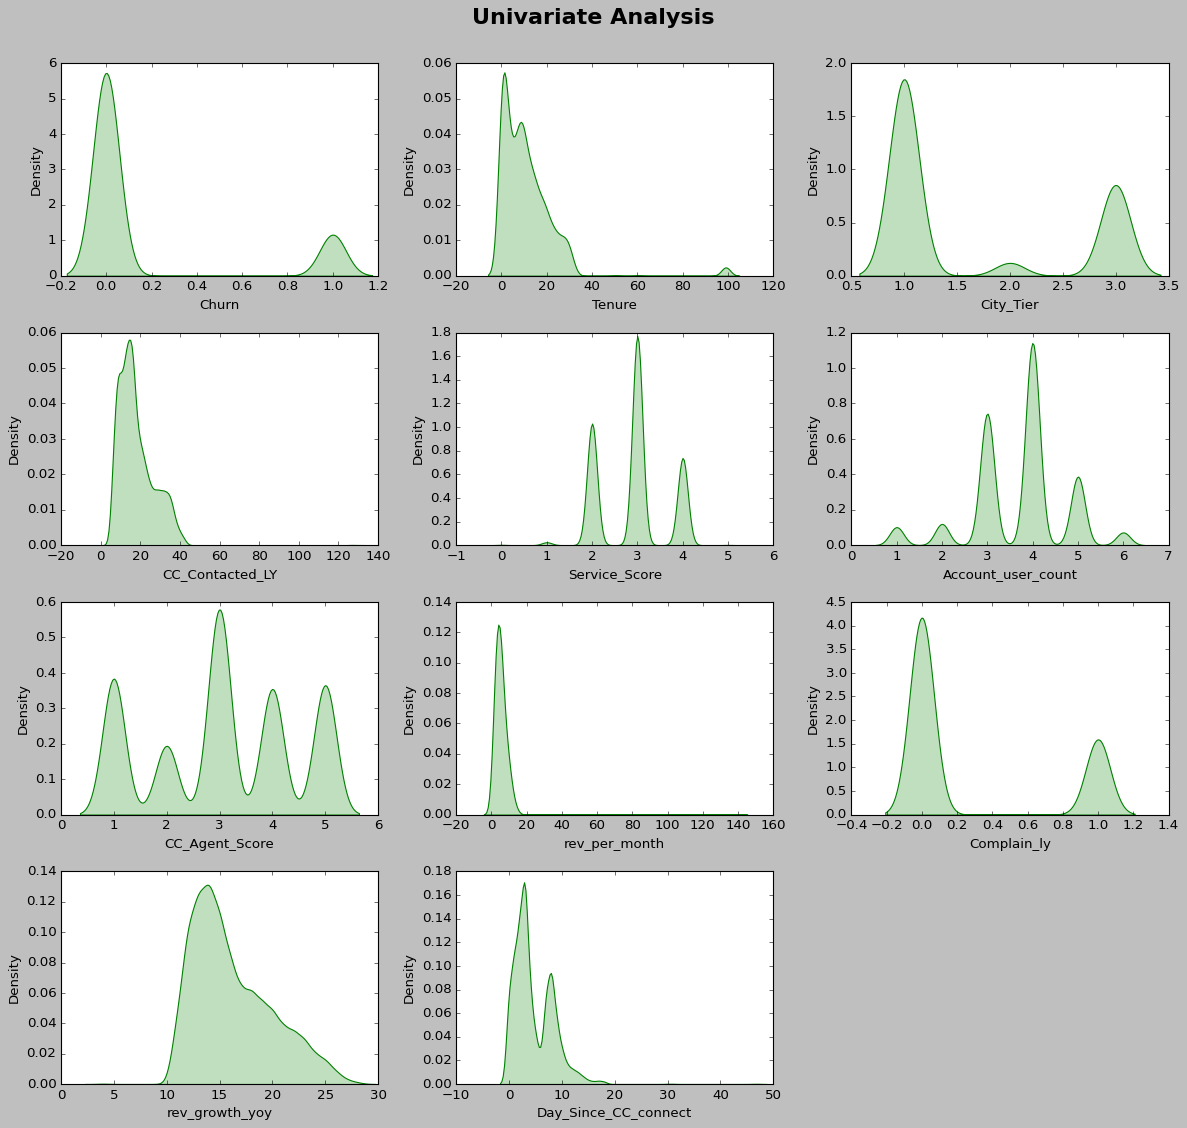

In [220]:
plt.figure(figsize=(15,17))
plt.suptitle('Univariate Analysis',fontsize=20,fontweight='bold',y=1)

for i in range(0,len(num_feature)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=cf[num_feature[i]],shade=True,color='g')
    plt.xlabel(num_feature[i])
    plt.tight_layout()

>Observations
>- CC_Agent_scored are normally distributed.
>- Tenure,Day_Since_CC_connect,rev_per_month,CC_Contacted_ly, is havily left skewed.
>- Almost 50% of the customefr are not active.

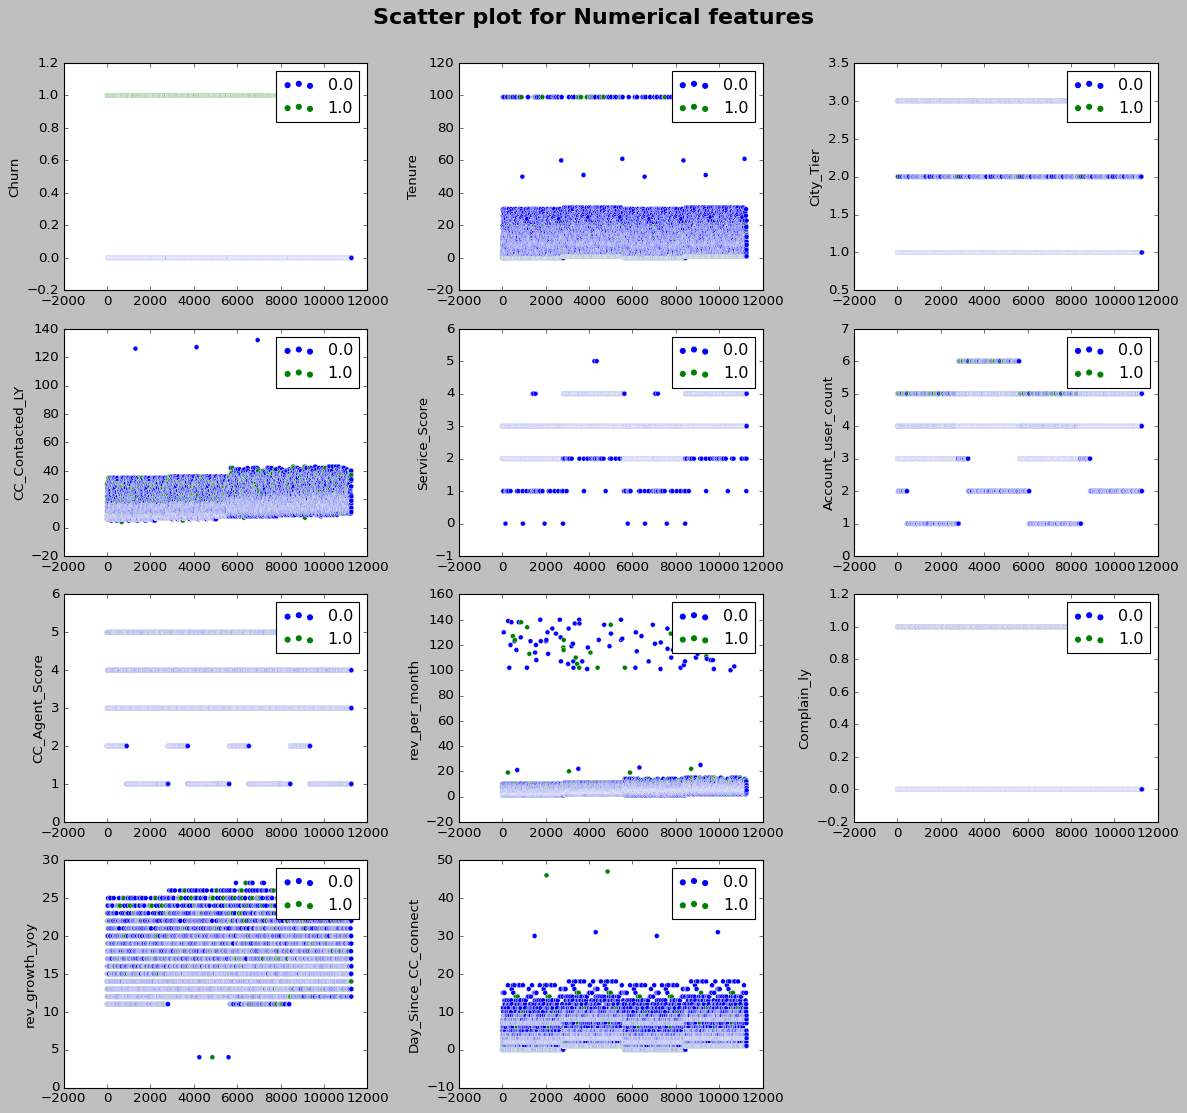

In [221]:
plt.figure(figsize=(15,17)) #fixing the size of graph
plt.suptitle('Scatter plot for Numerical features',fontsize=20,fontweight='bold',y=1) # placing at top of the graph heading.

for i in range(0,len(num_feature)):
    plt.subplot(5,3,i+1)
    sns.scatterplot(y=num_feature[i],x=cf.index,data=cf,color='b',hue='Churn')
    plt.legend(loc="upper right")
    plt.tight_layout()

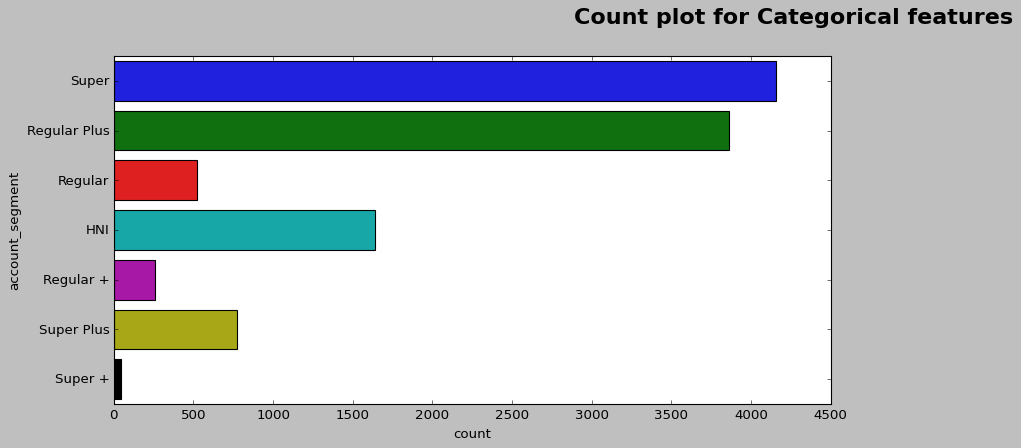

In [222]:
plt.figure(figsize=(20,40))
plt.suptitle('Count plot for Categorical features',fontsize=20,fontweight='bold',y=1)

for i in range(0,len(cat_feature)):
    plt.subplot(8,2,i+1)
    sns.countplot(y=cat_feature[i],data=cf)
    plt.tight_layout()

#### Bivariate Analysis

<Figure size 800x1600 with 0 Axes>

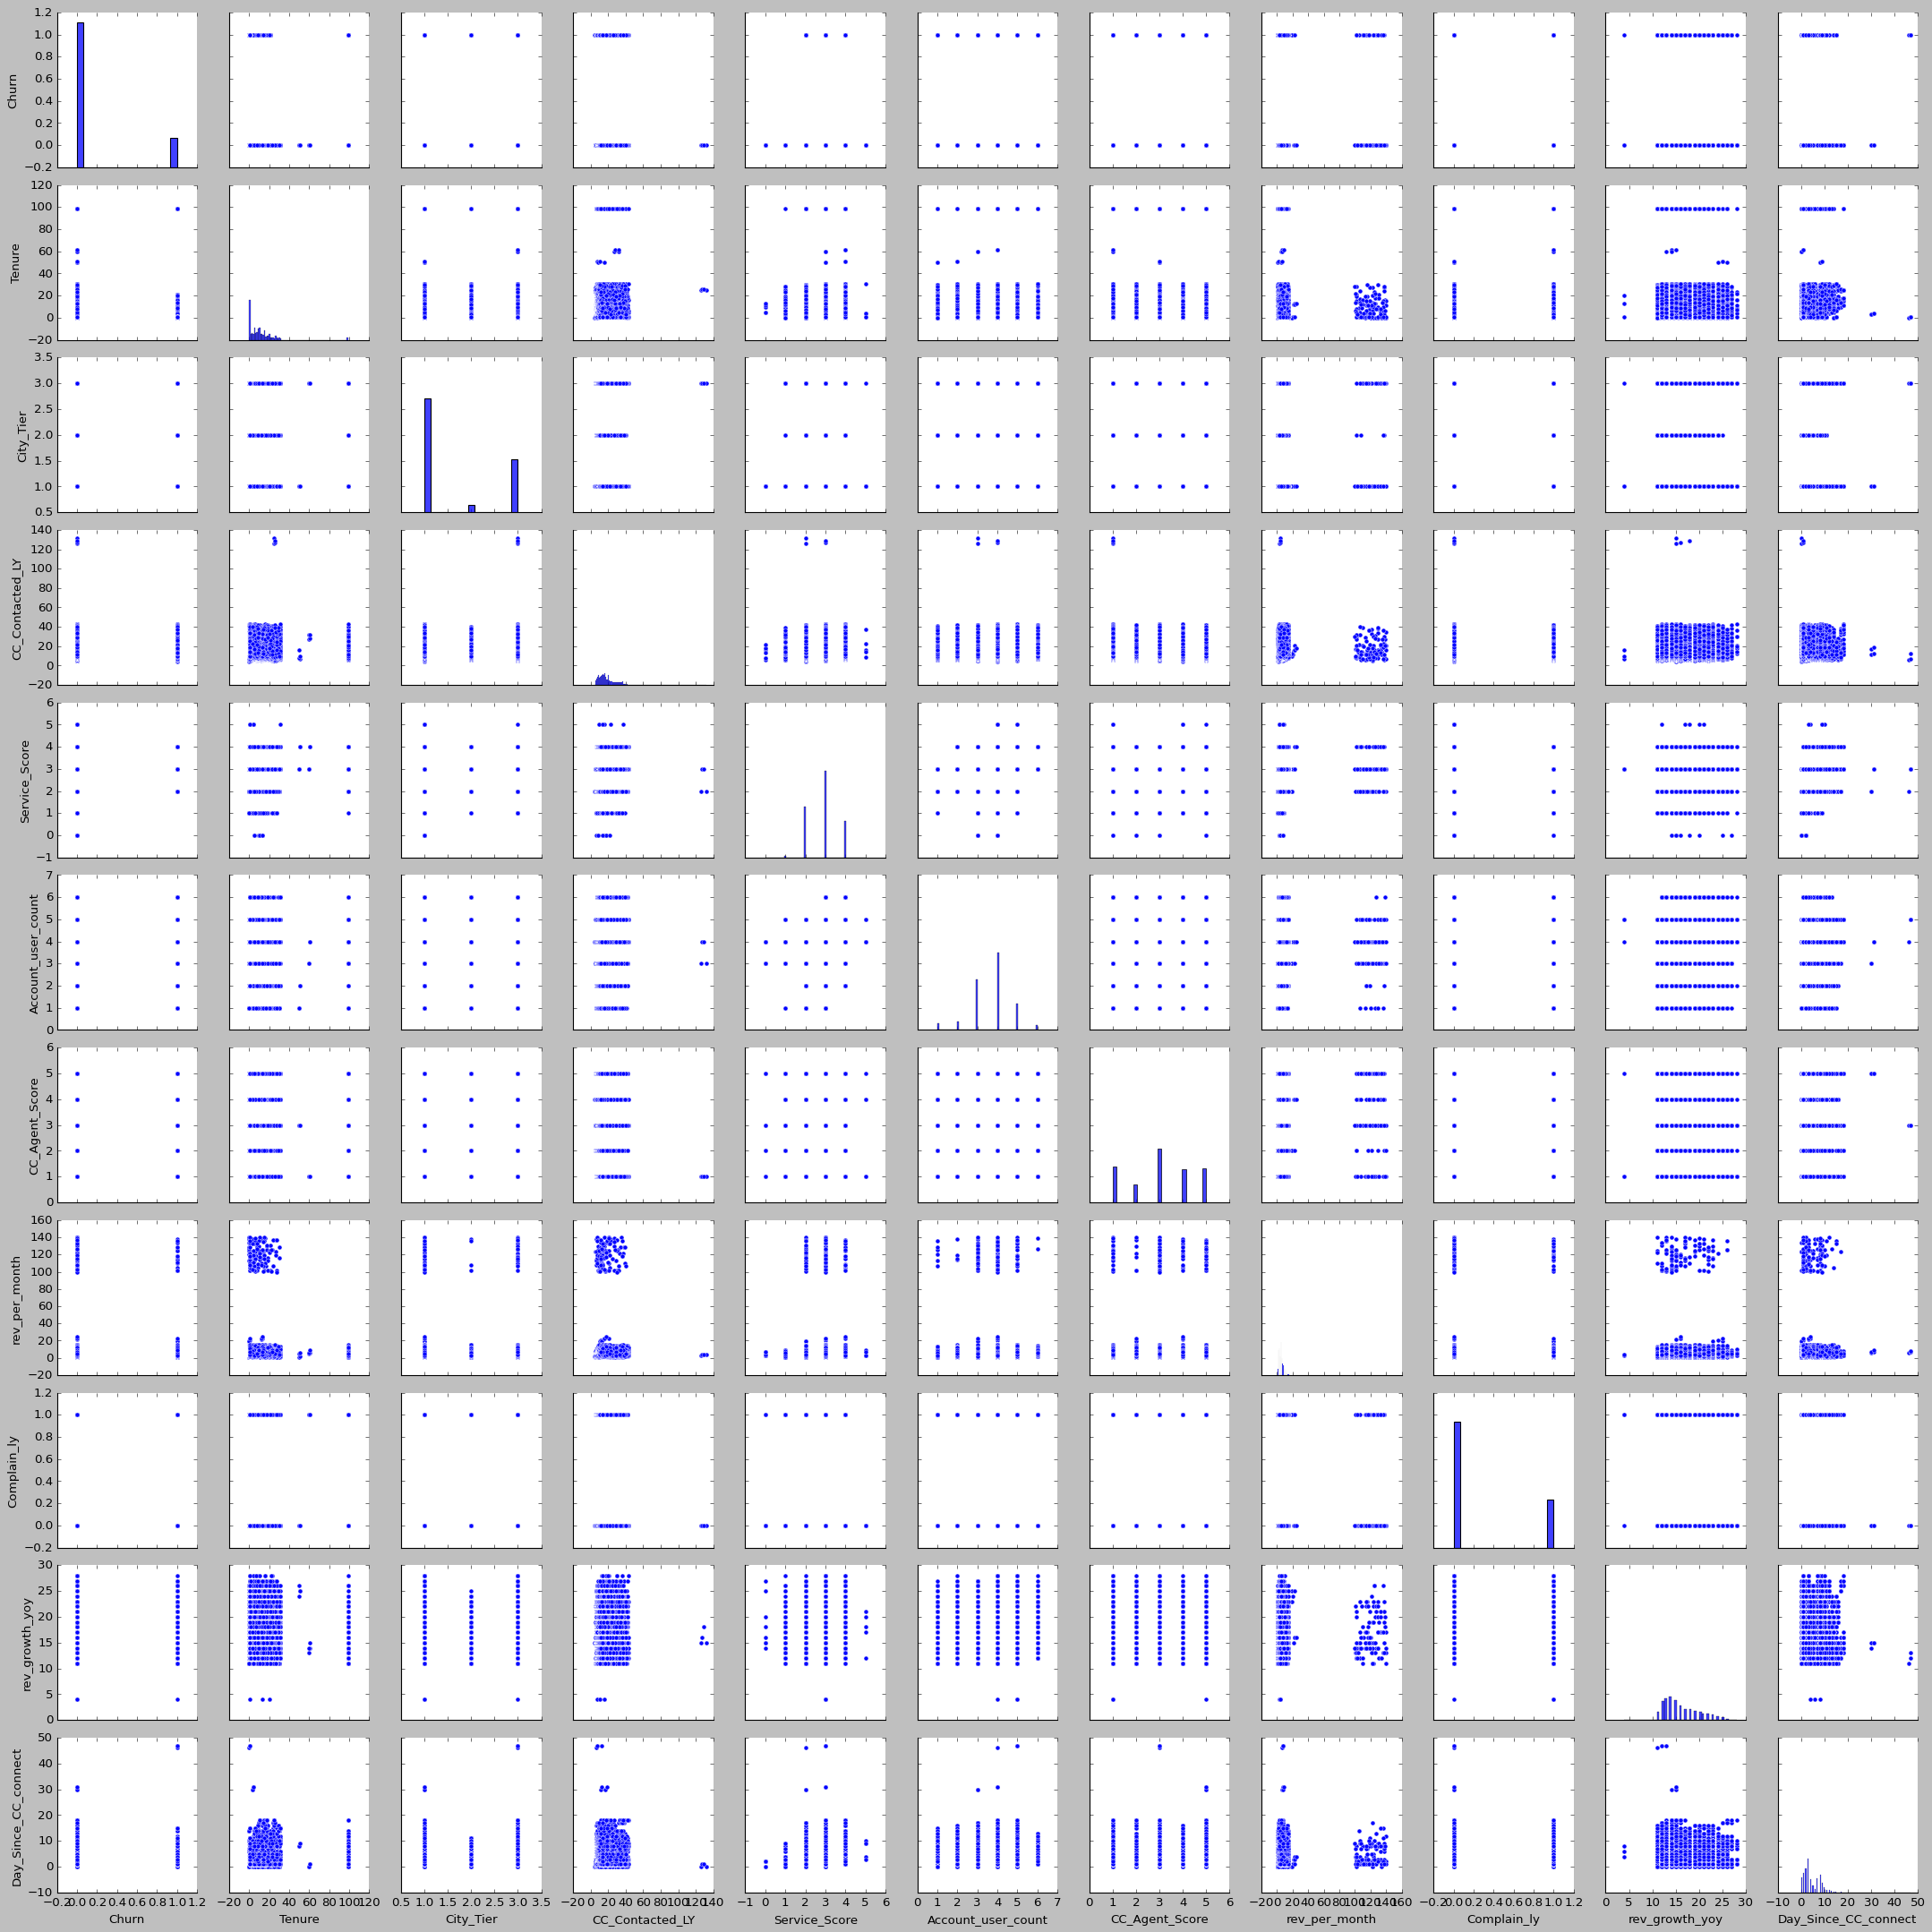

In [223]:
plt.figure(figsize=(10,20))
sns.pairplot(cf)
plt.show()

#### Bivariate Analysis w.r.t Target Variable

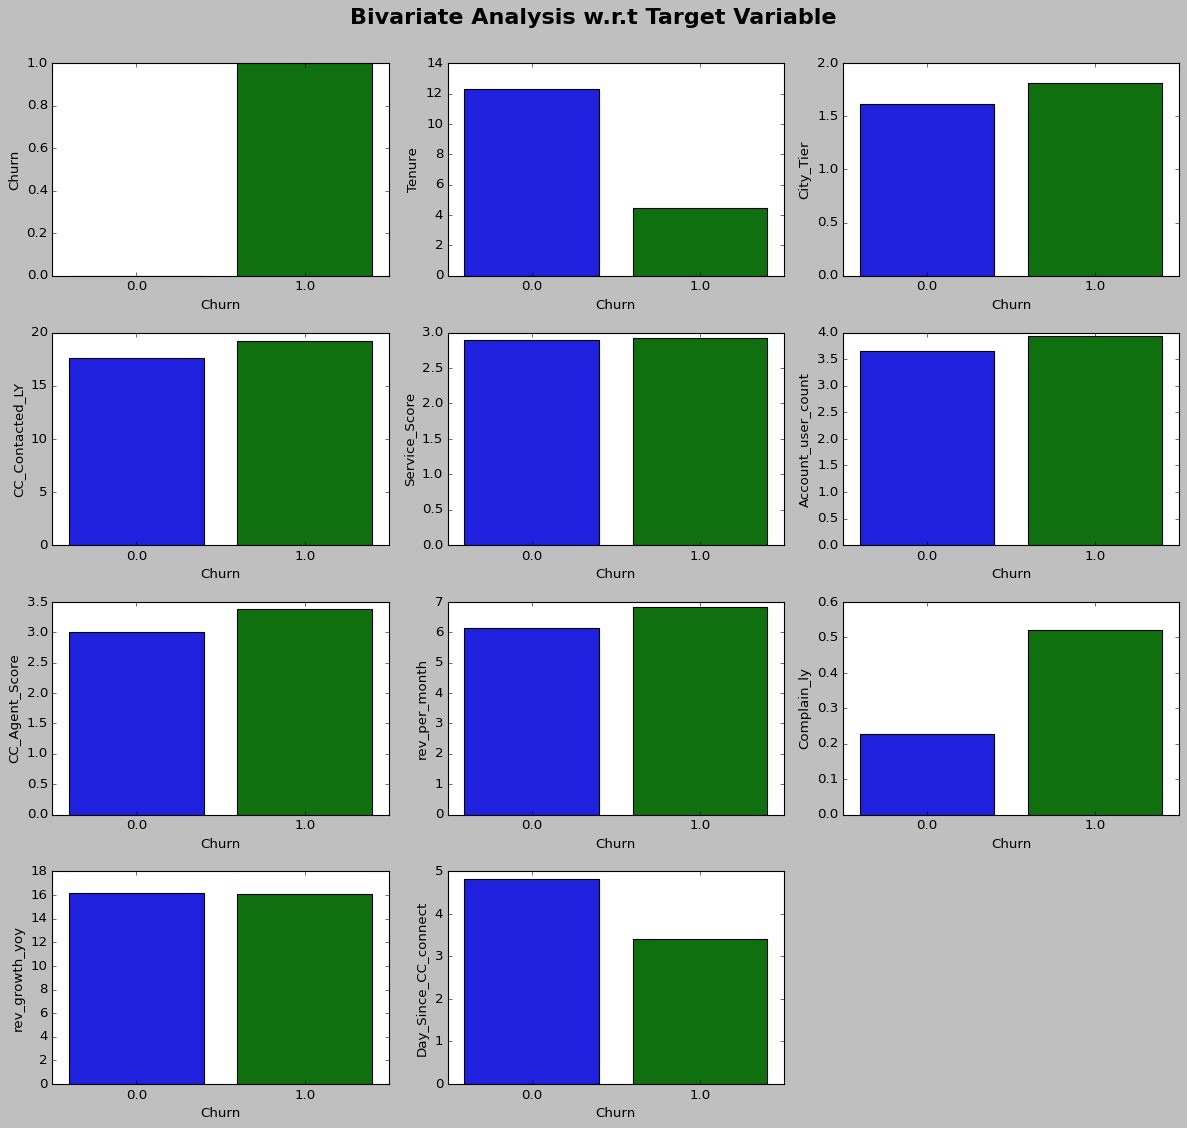

In [224]:
plt.figure(figsize=(15,17))
plt.suptitle('Bivariate Analysis w.r.t Target Variable',fontsize=20,fontweight='bold',y=1)

for i in range(0,len(num_feature)):
    plt.subplot(5,3,i+1)
    sns.barplot(y=num_feature[i],x='Churn',data=cf,ci=0)
    plt.tight_layout()

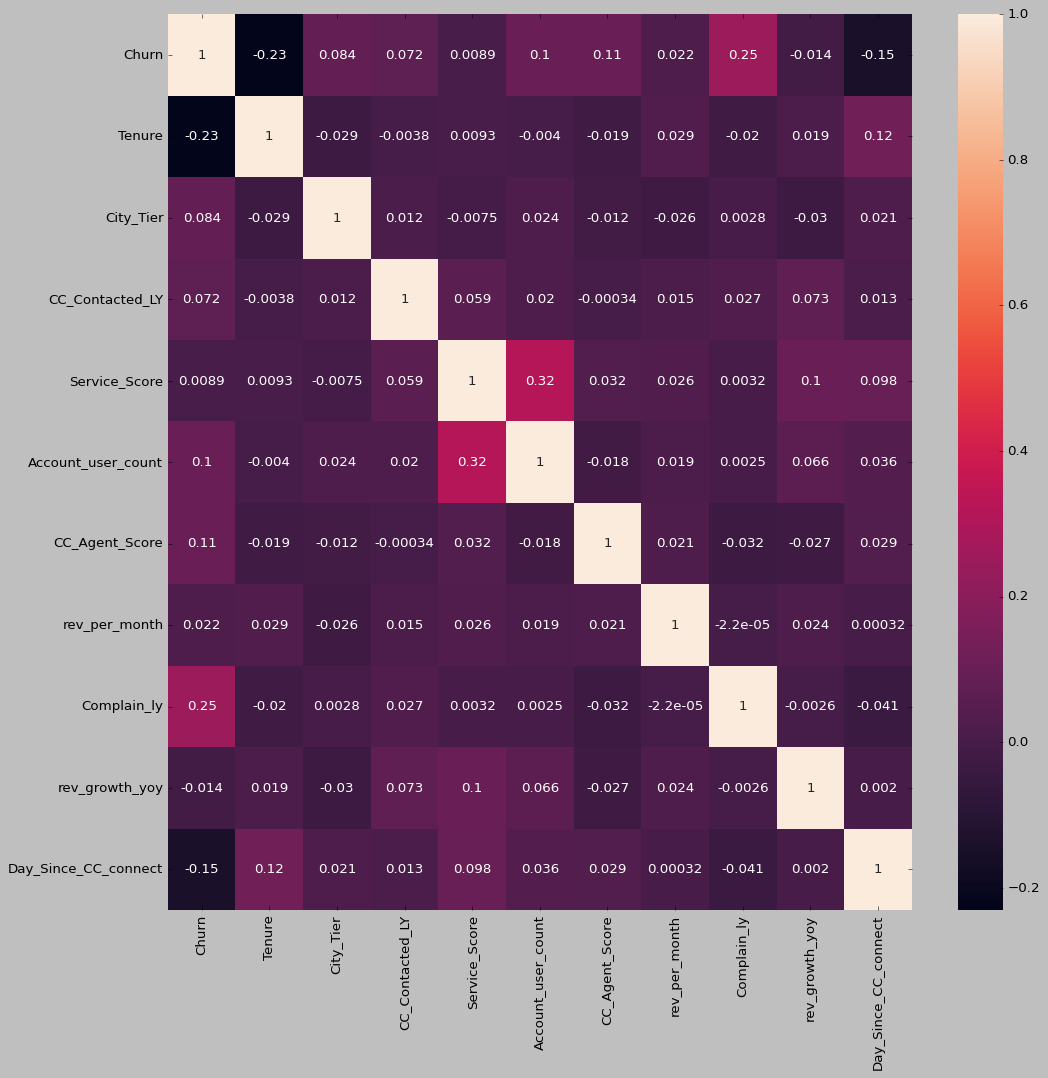

In [225]:
# Select only numeric columns
numeric_columns = cf.select_dtypes(include=['float', 'int'])

# Calculate the correlation matrix
corr_matrix = numeric_columns.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(15, 14))
sns.heatmap(corr_matrix, annot=True)
plt.show()

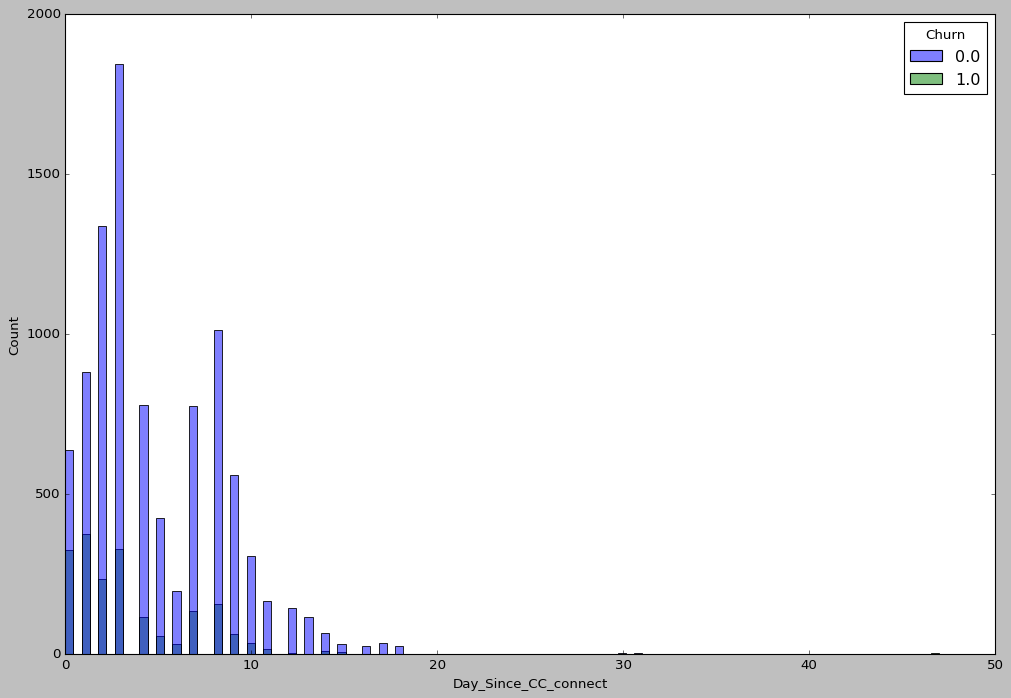

In [226]:
plt.figure(figsize=(15,10))
sns.histplot(x='Day_Since_CC_connect',hue='Churn',data=cf)
plt.show()

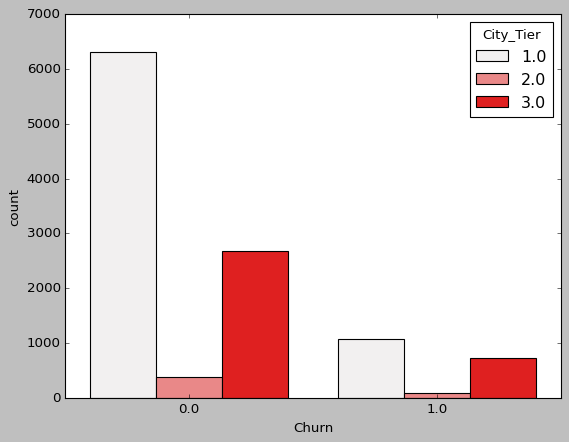

In [227]:
sns.countplot(x=cf.Churn,hue=cf.City_Tier,color='red')
plt.show()

<Axes: xlabel='Churn', ylabel='count'>

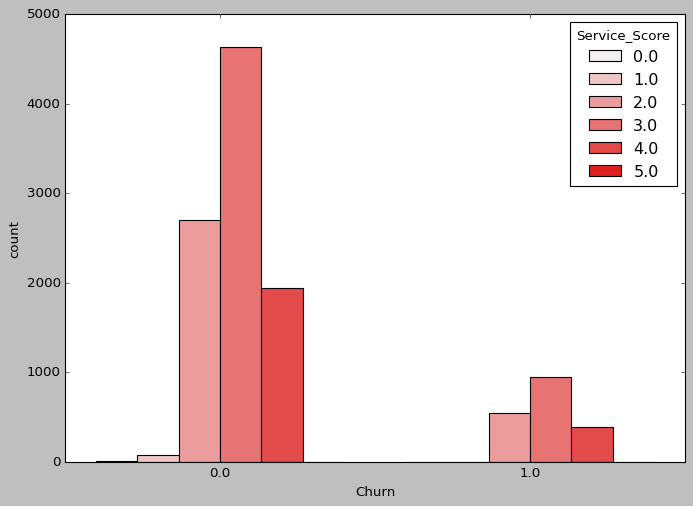

In [228]:
plt.figure(figsize=(10,7))
sns.countplot(x='Churn',hue='Service_Score',data=cf,color='red')

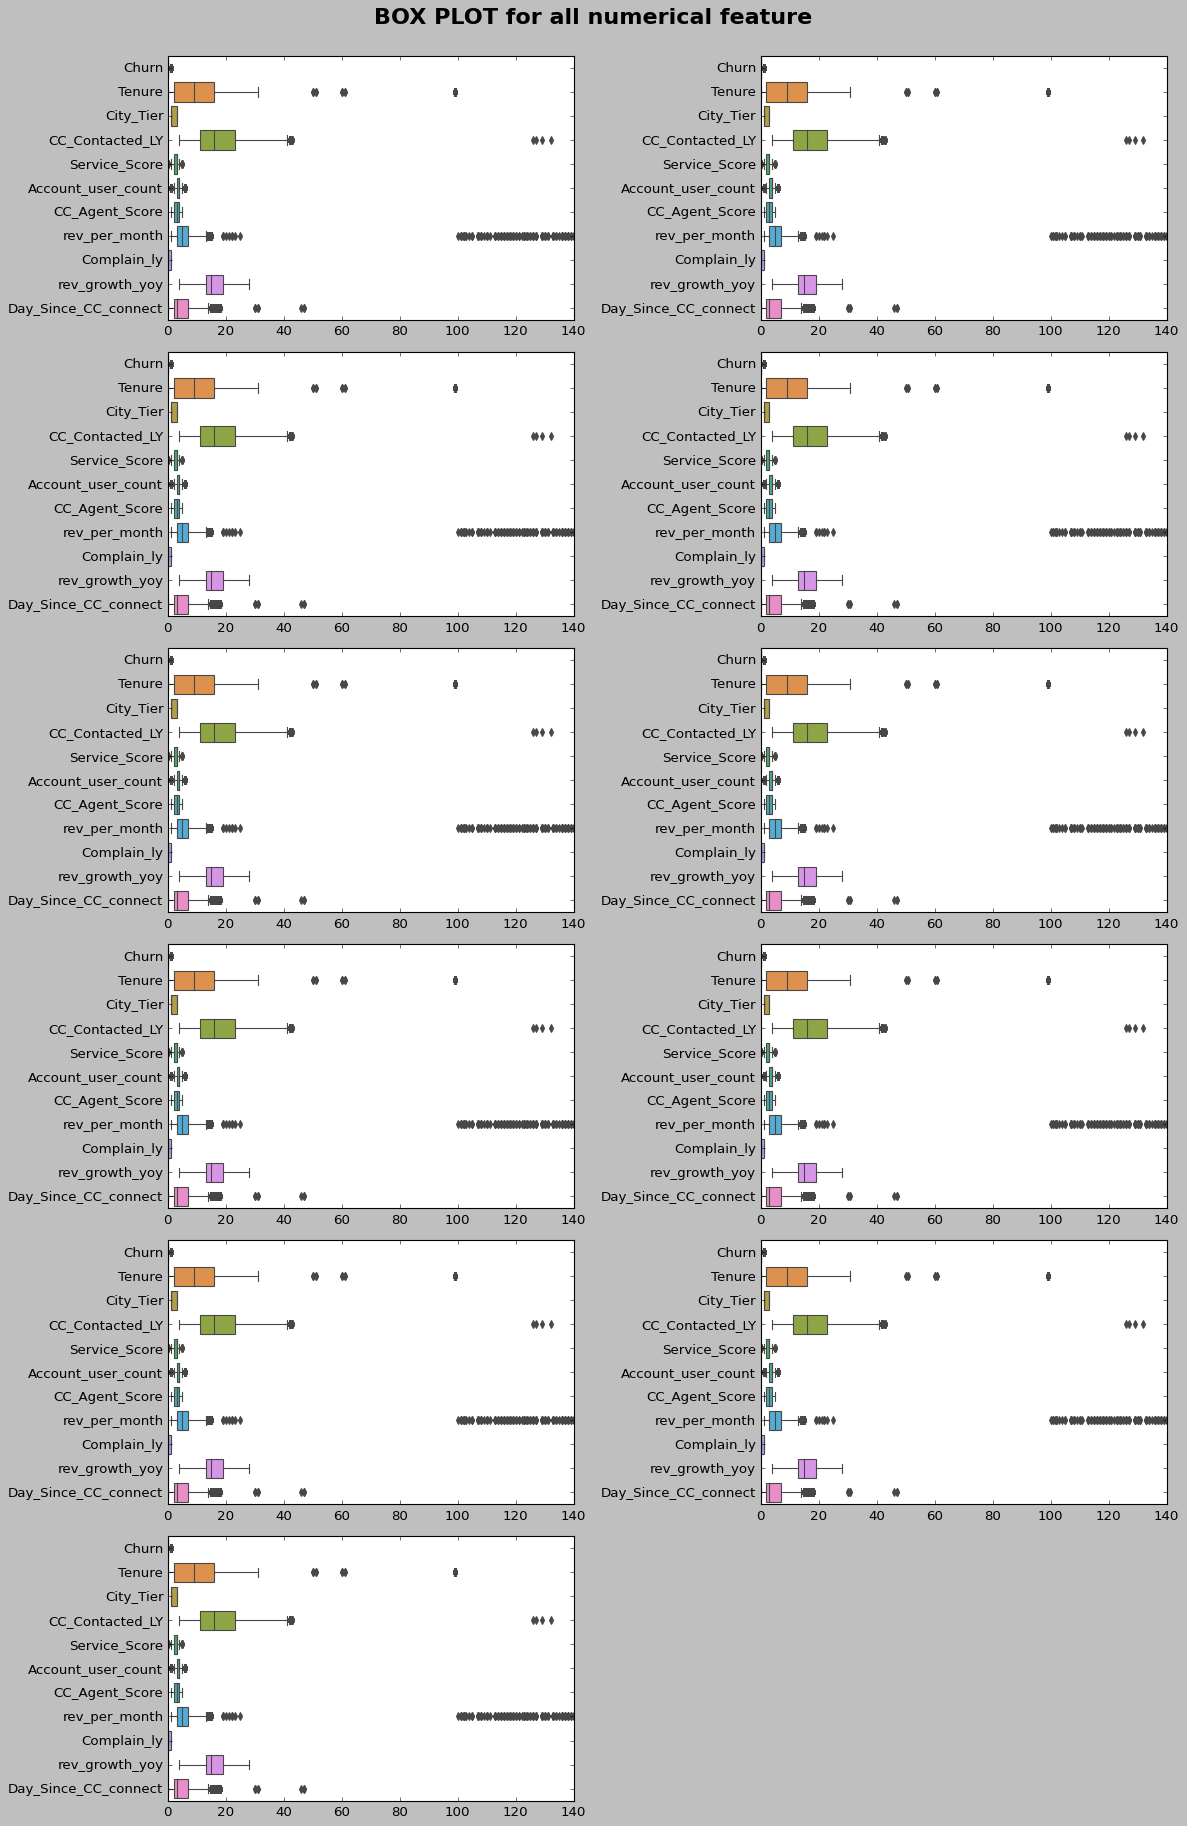

In [229]:
plt.figure(figsize=(15,30))
plt.suptitle('BOX PLOT for all numerical feature',fontsize=20,fontweight='bold',y=1)

for i in range(0,len(num_feature)):
    plt.subplot(8,2,i+1)
    sns.boxplot(data=cf[num_feature],orient='h') # checking the outliers are present or not
    plt.tight_layout()


# 6. <U>Data Preprocessing</U>


Feature encoding to convert the categorical features into numerical values

In [230]:
cf.head() #checking top 5 rows of the data set

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,Day_Since_CC_connect
0,1.0,4.0,3.0,6.0,3.0,3.0,Super,2.0,9.0,1.0,11.0,5.0
1,1.0,0.0,1.0,8.0,3.0,4.0,Regular Plus,3.0,7.0,1.0,15.0,0.0
2,1.0,0.0,1.0,30.0,2.0,4.0,Regular Plus,3.0,6.0,1.0,14.0,3.0
3,1.0,0.0,3.0,15.0,2.0,4.0,Super,5.0,8.0,0.0,23.0,3.0
4,1.0,0.0,1.0,12.0,2.0,3.0,Regular Plus,5.0,3.0,0.0,11.0,3.0


In [231]:
#Now doing one_hot_encoding to convert categorical features into numerical feature
cf1=pd.get_dummies(data=cf,columns=['account_segment'],drop_first=True)

In [232]:
cf1.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,Day_Since_CC_connect,account_segment_Regular,account_segment_Regular +,account_segment_Regular Plus,account_segment_Super,account_segment_Super +,account_segment_Super Plus
0,1.0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,5.0,False,False,False,True,False,False
1,1.0,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,False,False,True,False,False,False
2,1.0,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,3.0,False,False,True,False,False,False
3,1.0,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,3.0,False,False,False,True,False,False
4,1.0,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,11.0,3.0,False,False,True,False,False,False


### Extracting the target column into separate vectors for training set and test set

In [233]:
X=cf1.drop(['Churn'],axis=1) #dropping the label
Y=cf1['Churn']
X.shape,Y.shape #checking shape

((11260, 16), (11260,))

In [234]:
X.head()

,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,Day_Since_CC_connect,account_segment_Regular,account_segment_Regular +,account_segment_Regular Plus,account_segment_Super,account_segment_Super +,account_segment_Super Plus
0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,5.0,False,False,False,True,False,False
1,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,False,False,True,False,False,False
2,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,3.0,False,False,True,False,False,False
3,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,3.0,False,False,False,True,False,False
4,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,11.0,3.0,False,False,True,False,False,False


In [235]:
Y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Churn, dtype: float64

In [236]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Balancing the dataset by using oversampling technique

In [237]:
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt

smk = SMOTETomek()
X_res, Y_res = smk.fit_resample(X, Y)
%matplotlib inline

In [238]:
X_res.shape,Y_res.shape #after balancing the data set checking new shape

((18722, 16), (18722,))

## <em> Splitting the dataset into train and test data </em>

In [239]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_res,Y_res,test_size=0.2,random_state=0)

### Feature Scaling

In [240]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [241]:
X_train

array([[ 0.76170382, -0.78267469,  0.29484133, ...,  1.38545775,
        -0.05489683, -0.23232751],
       [-0.57349236, -0.09852666,  1.3203272 , ...,  1.38545775,
        -0.05489683, -0.23232751],
       [ 0.91878572, -0.78267469, -1.18641605, ...,  1.38545775,
        -0.05489683, -0.23232751],
       ...,
       [-0.1807876 , -0.78267469, -1.07247317, ...,  1.38545775,
        -0.05489683, -0.23232751],
       [-0.25932856, -0.78267469,  0.29484133, ..., -0.72178311,
        -0.05489683,  4.30426852],
       [-0.49495141, -0.78267469, -1.30035892, ...,  1.38545775,
        -0.05489683, -0.23232751]])

In [242]:
X_test

array([[-0.65203331, -0.05173276,  2.11792732, ...,  1.38545775,
        -0.05489683, -0.23232751],
       [ 0.60462191,  0.31054387,  0.52272707, ..., -0.72178311,
        -0.05489683,  4.30426852],
       [ 1.78273619,  1.40376243,  2.11792732, ..., -0.72178311,
        -0.05489683, -0.23232751],
       ...,
       [ 0.91878572, -0.78267469,  1.20638432, ..., -0.72178311,
        -0.05489683, -0.23232751],
       [ 0.21191715,  1.40376243, -0.61670167, ..., -0.72178311,
        -0.05489683, -0.23232751],
       [-0.60080977,  1.40376243,  1.05281086, ...,  1.38545775,
        -0.05489683, -0.23232751]])

In [243]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((14977, 16), (3745, 16), (14977,), (3745,))

In [244]:
Y_test.value_counts(normalize=True)*100

Churn
1.0    50.226969
0.0    49.773031
Name: proportion, dtype: float64

In [245]:
Y_train.value_counts(normalize=True)*100

Churn
0.0    50.056754
1.0    49.943246
Name: proportion, dtype: float64

In [246]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train)
Y_predict=model.predict(X_test)
type(model)

sklearn.linear_model._logistic.LogisticRegression

In [247]:
model_score=model.score(X_test,Y_test)
print('Accuracy score is',model_score*100)

Accuracy score is 79.62616822429906


In [248]:
confusion_mat = confusion_matrix(Y_test, Y_predict) # Calculate the confusion matrix

print("Confusion Matrix:\n", confusion_mat)  # Print the confusion matrix


Confusion Matrix:
 [[1460  404]
 [ 359 1522]]


## <em> Buiding the Model </em>

In [249]:
!pip install --upgrade scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [250]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('classic')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import metrics

In [251]:
param_grid = {
'criterion': ['gini'],
'max_depth': [10],#[10,20,30,50]#[3,5,7,9]
'min_samples_leaf': [250],#[100,150,200,250]# 1-3% 50-150
'min_samples_split': [750]#[150,300,450,600,750] # 150 - 450
}
dtcl = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [252]:
grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 250, 'min_samples_split': 750}

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 250, 'min_samples_split': 750}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=250,
                       min_samples_split=750)

In [253]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## <em>Predicting on Training and Test dataset</em>

In [254]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.000000,1.000000
1,0.925550,0.074450
2,0.676923,0.323077
3,0.980583,0.019417
4,0.000000,1.000000


## <em>Model Evaluation</em>

### Confusion Matrix for the Training Data

In [255]:
confusion_matrix(Y_train, ytrain_predict)

array([[6355, 1142],
       [1239, 6241]], dtype=int64)

In [256]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,Y_train)
cart_train_acc

0.8410229017827335

In [257]:
print(classification_report(Y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84      7497
         1.0       0.85      0.83      0.84      7480

    accuracy                           0.84     14977
   macro avg       0.84      0.84      0.84     14977
weighted avg       0.84      0.84      0.84     14977



In [258]:
cart_metrics=classification_report(Y_train, ytrain_predict,output_dict=True)
cf1=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(cf1.loc["1.0"][0],2)
cart_train_recall=round(cf1.loc["1.0"][1],2)
cart_train_f1=round(cf1.loc["1.0"][2],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.85
cart_train_recall  0.83
cart_train_f1  0.84


### Confusion Matrix for the Testing Data

In [259]:
confusion_matrix(Y_test, ytest_predict)

array([[1581,  283],
       [ 324, 1557]], dtype=int64)

In [260]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,Y_test)
cart_test_acc

0.837917222963952

In [261]:
print(classification_report(Y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84      1864
         1.0       0.85      0.83      0.84      1881

    accuracy                           0.84      3745
   macro avg       0.84      0.84      0.84      3745
weighted avg       0.84      0.84      0.84      3745



In [262]:
cart_metrics=classification_report(Y_test, ytest_predict,output_dict=True)
cf1=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(cf1.loc["1.0"][0],2)
cart_test_recall=round(cf1.loc["1.0"][1],2)
cart_test_f1=round(cf1.loc["1.0"][2],2)
print ('cart_train_precision ',cart_test_precision)
print ('cart_train_recall ',cart_test_recall)
print ('cart_train_f1 ',cart_test_f1)

cart_train_precision  0.85
cart_train_recall  0.83
cart_train_f1  0.84


## <em>Building a Random Forest Classifier</em>

Grid Search for finding out the optimal values for the hyper parameters

Due to large volume of data, trying for different parameter values in the gridsearch with higher cv value will lead
to performance issues and model will run for much longer time

In [263]:
param_grid = {#put a grid for hyperparameters
'max_depth': [8,9],
'max_features': [8,9],#[5,4,6],
'min_samples_leaf': [250,150],
'min_samples_split': [750,500],
'n_estimators': [100,150]#150,250
}
rfcl = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [264]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 9], 'max_features': [8, 9],
                         'min_samples_leaf': [250, 150],
                         'min_samples_split': [750, 500],
                         'n_estimators': [100, 150]})

In [265]:
param_grid

{'max_depth': [8, 9],
 'max_features': [8, 9],
 'min_samples_leaf': [250, 150],
 'min_samples_split': [750, 500],
 'n_estimators': [100, 150]}

In [266]:
grid_search.best_params_

{'max_depth': 9,
 'max_features': 8,
 'min_samples_leaf': 150,
 'min_samples_split': 750,
 'n_estimators': 150}

In [267]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=9, max_features=8, min_samples_leaf=150,
                       min_samples_split=750, n_estimators=150)

## <em>Predicting the Training and Testing data </em>

In [268]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## <em>RF Model Perfotrmance Evaluation on Training data</em>

In [269]:
confusion_matrix(Y_train,ytrain_predict)

array([[6313, 1184],
       [1063, 6417]], dtype=int64)

In [270]:
rf_train_acc=best_grid.score(X_train,Y_train)
rf_train_acc
rf_test_acc=best_grid.score(X_test,Y_test)
rf_test_acc

0.8419225634178905

In [271]:
print(classification_report(Y_train,ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      7497
         1.0       0.84      0.86      0.85      7480

    accuracy                           0.85     14977
   macro avg       0.85      0.85      0.85     14977
weighted avg       0.85      0.85      0.85     14977



In [272]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [273]:
rf_metrics=classification_report(Y_train, ytrain_predict,output_dict=True)
cf1=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(cf1.loc["1.0"][0],2)
rf_train_recall=round(cf1.loc["1.0"][1],2)
rf_train_f1=round(cf1.loc["1.0"][2],2)
rf_test_recall=round(cf1.loc["1.0"][1],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.84
rf_train_recall  0.86
rf_train_f1  0.85


Area under Curve is 0.8499789309663259


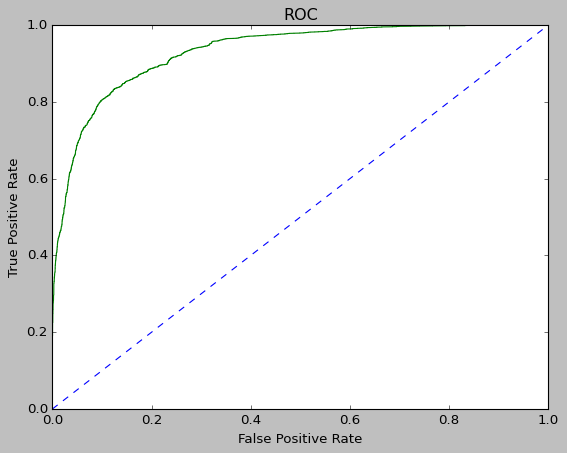

In [274]:
rf_train_fpr, rf_train_tpr,_=roc_curve(Y_train,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(Y_train,best_grid.predict(X_train))
print('Area under Curve is', rf_train_auc)

## <em>Building a Neural Network Classifier</em>

In [275]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [276]:
param_grid = {
'hidden_layer_sizes': [64,128],#[32,64,128], #Multiple layers(200,120)
'max_iter': [100,200,300],
'solver': ['adam','sgd'], #sgd
}
nncl = MLPClassifier(tol = 0.01)
grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 3)

In [277]:
grid_search.fit(X_train_scaled, Y_train)
#{'hidden_layer_sizes': 32, 'max_iter': 200, 'solver': 'adam', 'tol': 0.01}

GridSearchCV(cv=3, estimator=MLPClassifier(tol=0.01),
             param_grid={'hidden_layer_sizes': [64, 128],
                         'max_iter': [100, 200, 300],
                         'solver': ['adam', 'sgd']})

In [278]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=128, tol=0.01)

## <em>Predicting the Training and Testing data</em>

In [279]:
ytrain_predict = best_grid.predict(X_train_scaled)
ytest_predict = best_grid.predict(X_test_scaled)

## <em> NN Model Performance Evaluation on Training data

In [280]:
confusion_matrix(Y_train,ytrain_predict)

array([[6554,  943],
       [ 737, 6743]], dtype=int64)

In [281]:
nn_train_acc=best_grid.score(X_train_scaled,Y_train)
nn_train_acc

0.887828002937838

In [282]:
print(classification_report(Y_train,ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.89      7497
         1.0       0.88      0.90      0.89      7480

    accuracy                           0.89     14977
   macro avg       0.89      0.89      0.89     14977
weighted avg       0.89      0.89      0.89     14977



In [283]:
nn_metrics=classification_report(Y_train, ytrain_predict,output_dict=True)
cf1=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(cf1.loc["1.0"][0],2)
nn_train_recall=round(cf1.loc["1.0"][1],2)
nn_train_f1=round(cf1.loc["1.0"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.88
nn_train_recall  0.9
nn_train_f1  0.89


Area under Curve is 0.887843470721622


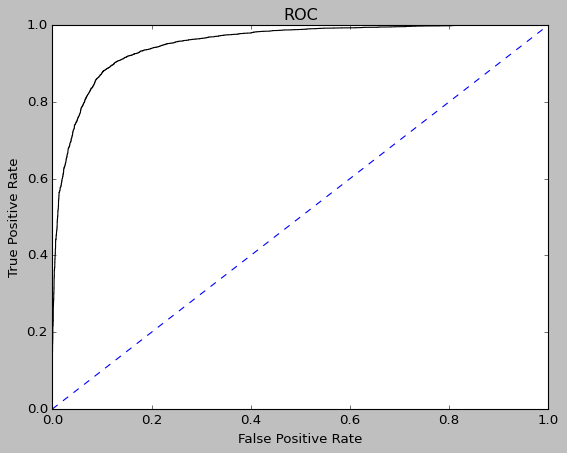

In [284]:
nn_train_fpr, nn_train_tpr,_=roc_curve(Y_train,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(Y_train,best_grid.predict(X_train))
print('Area under Curve is', nn_train_auc)

## <em>NN Model Performance Evaluation on Test data

In [285]:
confusion_matrix(Y_test,ytest_predict)

array([[1593,  271],
       [ 191, 1690]], dtype=int64)

In [286]:
nn_test_acc=best_grid.score(X_test_scaled,Y_test)
nn_test_acc

0.8766355140186916

In [287]:
print(classification_report(Y_test,ytest_predict))

              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87      1864
         1.0       0.86      0.90      0.88      1881

    accuracy                           0.88      3745
   macro avg       0.88      0.88      0.88      3745
weighted avg       0.88      0.88      0.88      3745



In [288]:
nn_metrics=classification_report(Y_test, ytest_predict,output_dict=True)
cf1=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(cf1.loc["1.0"][0],2)
nn_test_recall=round(cf1.loc["1.0"][1],2)
nn_test_f1=round(cf1.loc["1.0"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.86
nn_test_recall  0.9
nn_test_f1  0.88


Area under Curve is 0.8765360003924495


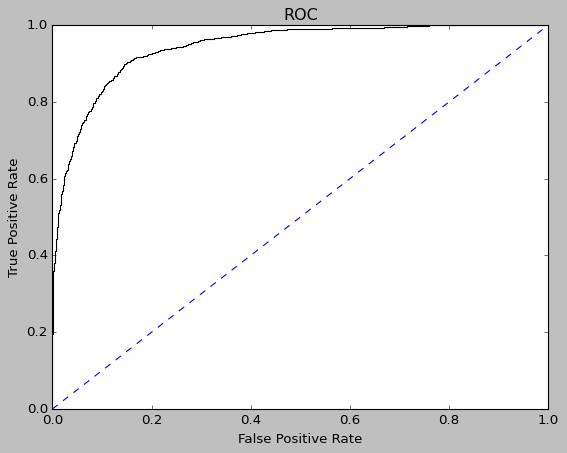

In [289]:
nn_test_fpr, nn_test_tpr,_=roc_curve(Y_test,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(Y_test,best_grid.predict(X_test))
print('Area under Curve is', nn_test_auc)

In [290]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=128, tol=0.01)>

In [291]:
index=['Accuracy','Recall','Precision','f1_Score']
data=pd.DataFrame({'CART Train':[cart_train_acc,cart_train_recall,cart_train_precision,cart_train_f1],
                    'CART Test':[cart_test_acc,cart_test_recall,cart_test_precision,cart_test_f1],
                    'Random forest train':[rf_train_acc,rf_train_recall,rf_train_precision,rf_train_f1],
                    'Neural Network train':[nn_train_acc,nn_train_recall,nn_train_precision,nn_train_f1],
                    'Neural Network test':[nn_test_acc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,6)

,CART Train,CART Test,Random forest train,Neural Network train,Neural Network test
Accuracy,0.841023,0.837917,0.84997,0.887828,0.876636
Recall,0.830000,0.830000,0.86000,0.900000,0.900000
Precision,0.850000,0.850000,0.84000,0.880000,0.860000
f1_Score,0.840000,0.840000,0.85000,0.890000,0.880000


### <em>Based on the provided output from the dataset, here is an interpretation of the accuracy scores for different models:</em>

####  1. Decision Tree (CART) Model:
- Train Data Accuracy: The decision tree model achieved a training accuracy of approximately 84.82% (0.8482). This indicates that the model correctly predicted the churn outcome for about 84.82% of the training data.
- Test Data Accuracy: The neural network model achieved a test accuracy of approximately 84.3% (0.8430). This suggests that the model correctly predicted the churn outcome for approximately 84.3% of the test data.

#### 2. Random Forest Model:
- Train Data Accuracy: The random forest model achieved a training accuracy of around 85.42% (0.8542). This suggests that the model correctly predicted the churn outcome for approximately 85.42% of the training data.

#### 3. Neutral Network Model:
- Train Data Accuracy: The neural network model achieved a training accuracy of approximately 88.24% (0.8824). This indicates that the model correctly predicted the churn outcome for around 88.24% of the training data.
- Test Data Accuracy: The neural network model achieved a test accuracy of approximately 88.25% (0.8825). This suggests that the model correctly predicted the churn outcome for approximately 82.25% of the test data.

### <em>Based on above observation our data set is good fit and good model</em>
### <em>Based on these results, the neural network model seems to have the highest accuracy both on the training and test data, indicating its better performance compared to the decision tree and random forest models. However, it is important to consider other factors such as model complexity, interpretability, and potential overfitting when selecting the best model for your specific churnprediction task.</em>